<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/linear-regression/Linear_regression_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
!head moore.csv

--2024-05-21 14:42:26--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-05-21 14:42:26 (26.6 MB/s) - ‘moore.csv’ saved [2302/2302]

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

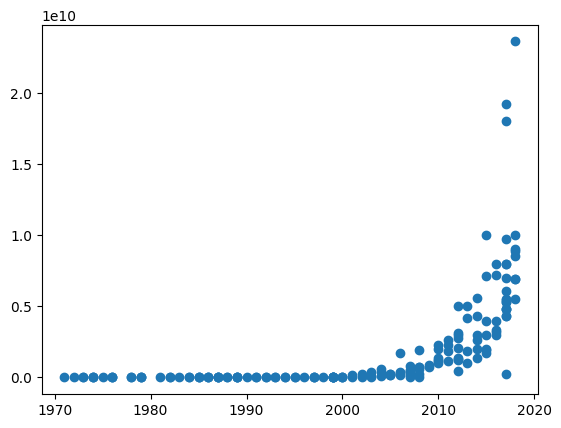

In [ ]:
plt.scatter(X,Y)

In [ ]:
Y = np.log(Y)

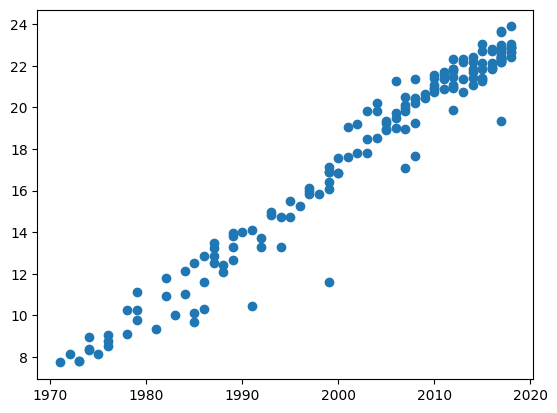

In [ ]:
plt.scatter(X,Y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# if we used scaling, we could've just put adam as the optimzier

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X,Y,epochs=200,callbacks =[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 527.9257 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 829.8417 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 897.2919 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 647.6449 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 651.5797 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 349.5038 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 150.8360 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 83.9438 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 83.5995 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 97.1043 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 

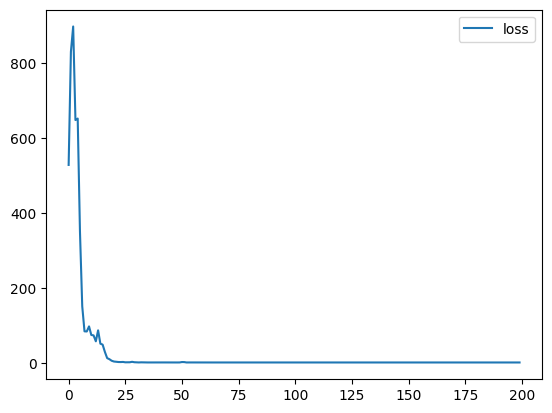

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [ ]:
a = model.layers[0].get_weights()

In [ ]:
a = a[0][0] # This is a slope and it tells us how fast the transistor count is growing

In [ ]:
#  C = A0 * R ^ t
# take log, Y^ = a.x + b
# a = logr = value of a above

In [ ]:
# we didnt scale the data so the answer is in years
print("Time to double: ", np.log(2)/a)

Time to double:  [1.9995323]


In [ ]:
# Analytical solution

In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()* X.sum())/denominator
b = (Y.mean() * X.dot(X) - X.mean()*X.dot(Y))/denominator
print(a,b)

0.341682487387313 17.764939393631764


6/6 [==============================] - 0s 3ms/step


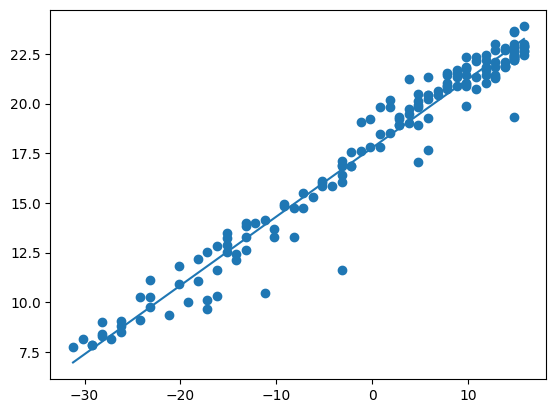

In [ ]:
## Making Predictions
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [ ]:
# manually calculate that dense layer does linear transformation
w, b = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yhat2 = (X.dot(w) + b).flatten()
# for float, we cant use == because of rounding error
np.allclose(Yhat, Yhat2)


True